# Denoising

Philippe Massouf
Diego Torres

In [ ]:
import numpy as np
import pandas as pd

from scipy.io.wavfile import read
from scipy.fft import fft, ifft, fftfreq, fftshift
from scipy.signal import welch, convolve2d

import matplotlib.pyplot as plt

In [ ]:
sr, noise1 = read('noise1.wav')
sr, noise2 = read('noise2.wav')
sr, noise3 = read('noise3.wav')

In [ ]:
def plot_figures(noise):
    periodogram  = fft(noise)
    freq = fftfreq(noise.shape[0], 1/sr)
    freqs, power = welch(noise, fs=sr, nperseg=1024)

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    ax1.plot(noise)
    ax1.set_xlabel('Time (frame)')
    ax1.set_ylabel('Amplitude')
    ax1.set_title('Time domain')


    ax2.plot(freq[:len(freq)//2], 20*np.log(np.abs(periodogram[:len(periodogram)//2])))
    ax2.set_xscale('log')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Power (dB)')


    ax3.plot(freqs, 10*np.log(power))
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_xscale('log')
    ax3.set_ylabel('Power (dB)')

    return freqs, power


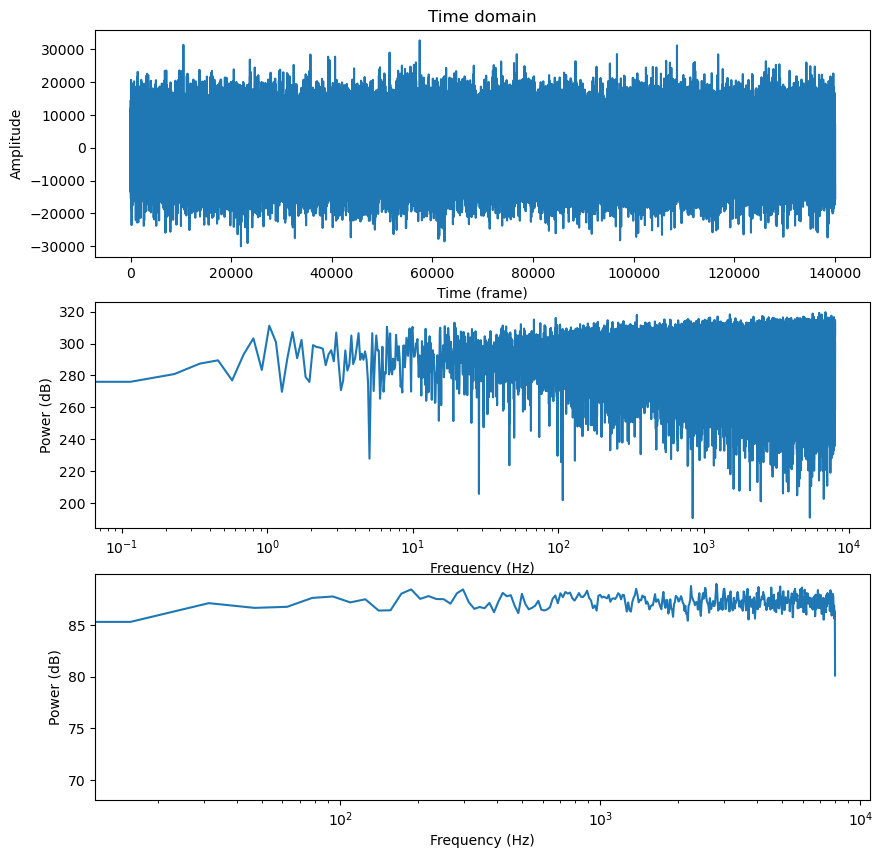

In [ ]:
freqs, noise1_power = plot_figures(noise1)

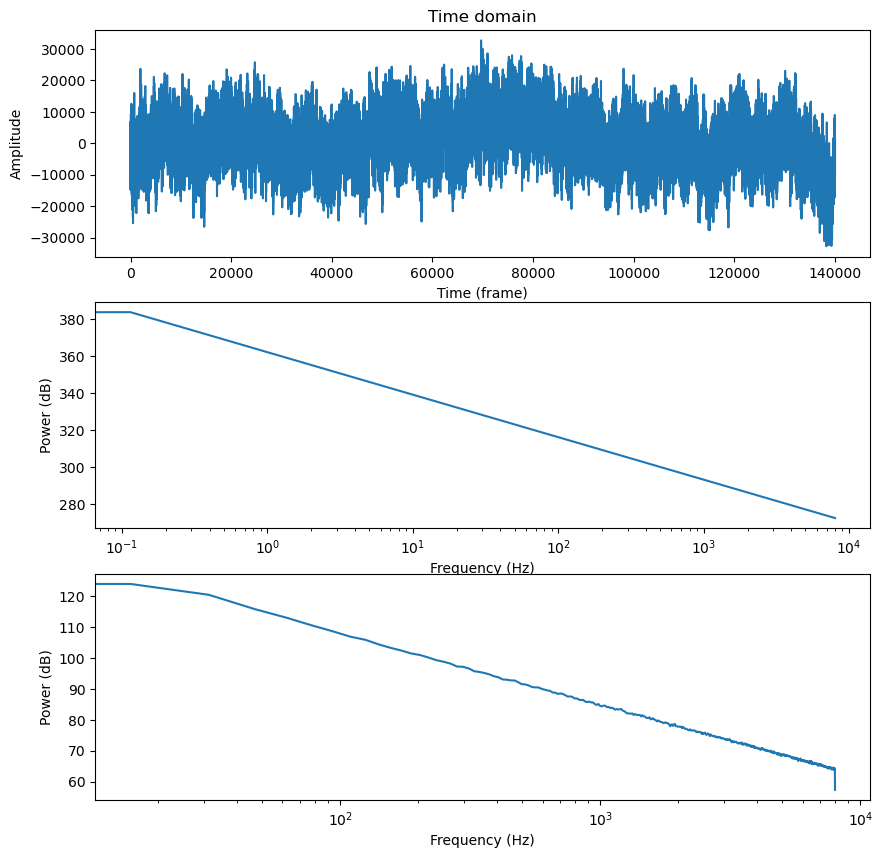

In [ ]:
freqs, noise2_power = plot_figures(noise2)

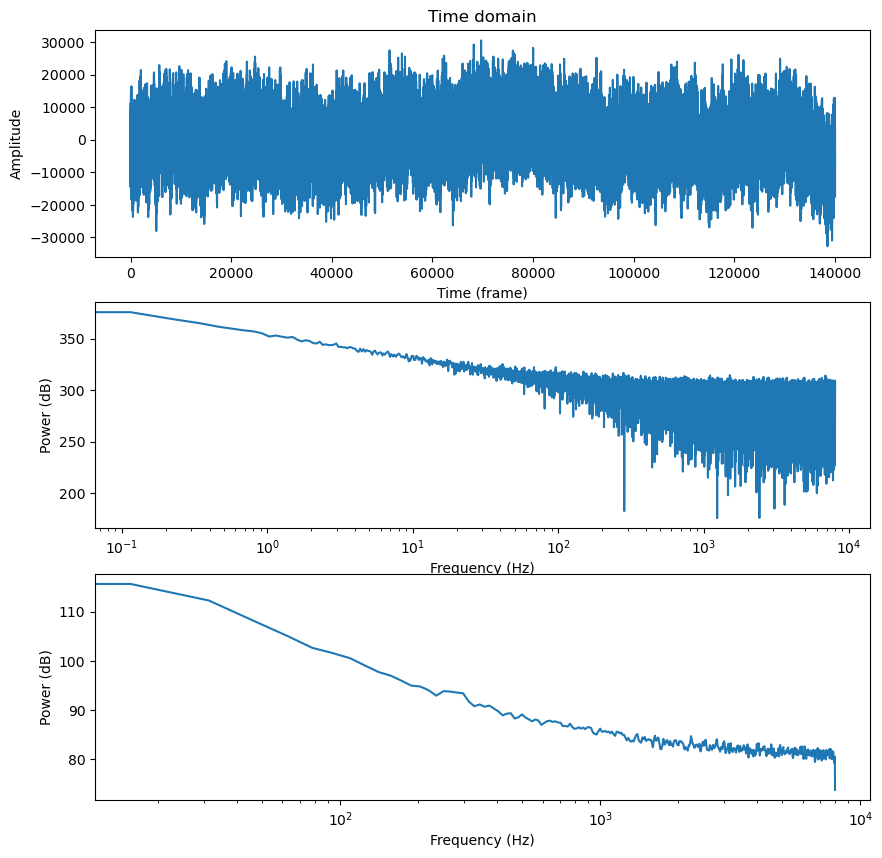

In [ ]:
freqs, noise3_power = plot_figures(noise3)

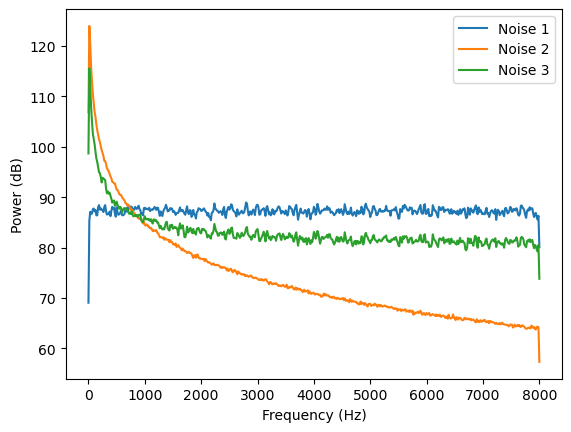

In [ ]:
plt.plot(freqs, 10*np.log(noise1_power), label='Noise 1')
plt.plot(freqs, 10*np.log(noise2_power), label='Noise 2')
plt.plot(freqs, 10*np.log(noise3_power), label='Noise 3')
# plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')

plt.legend()

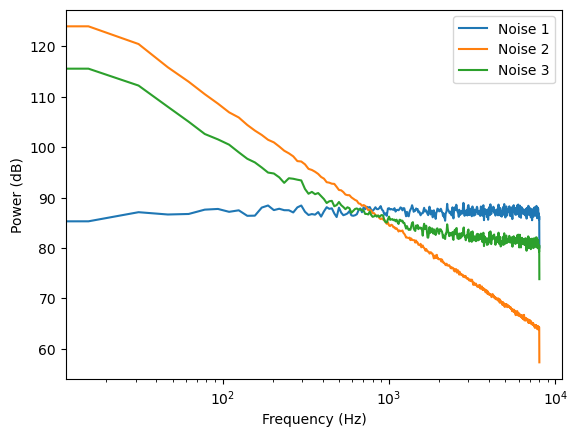

In [ ]:
plt.plot(freqs, 10*np.log(noise1_power), label='Noise 1')
plt.plot(freqs, 10*np.log(noise2_power), label='Noise 2')
plt.plot(freqs, 10*np.log(noise3_power), label='Noise 3')
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')

plt.legend()

# 2. Denoising images

## Noisy images generation

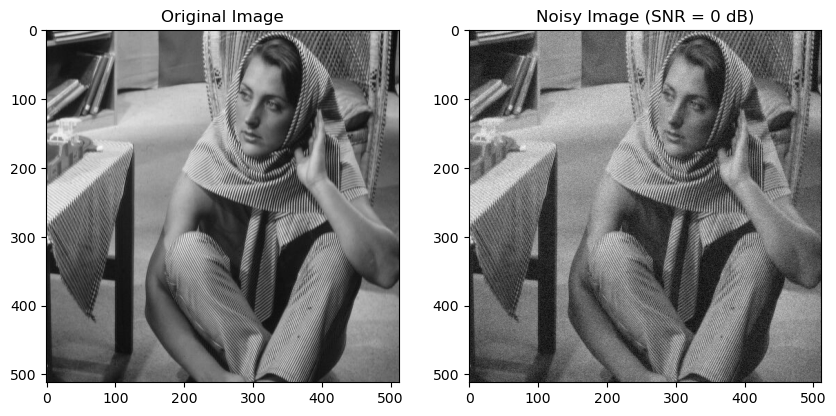

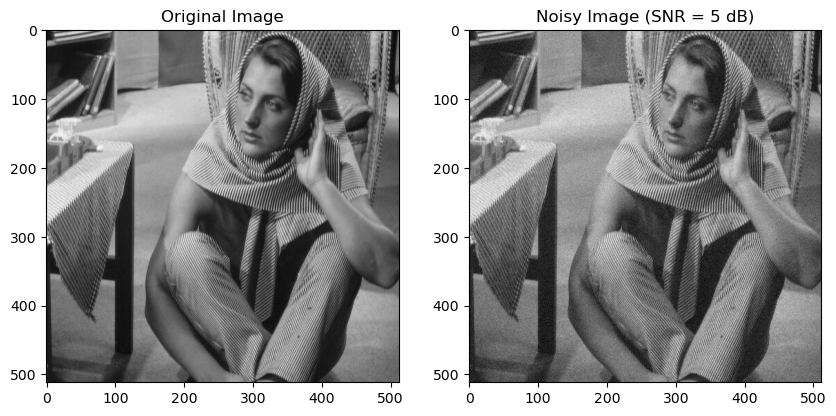

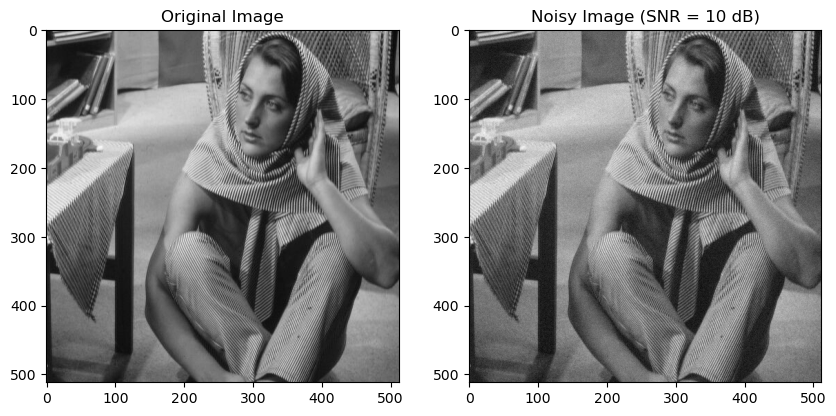

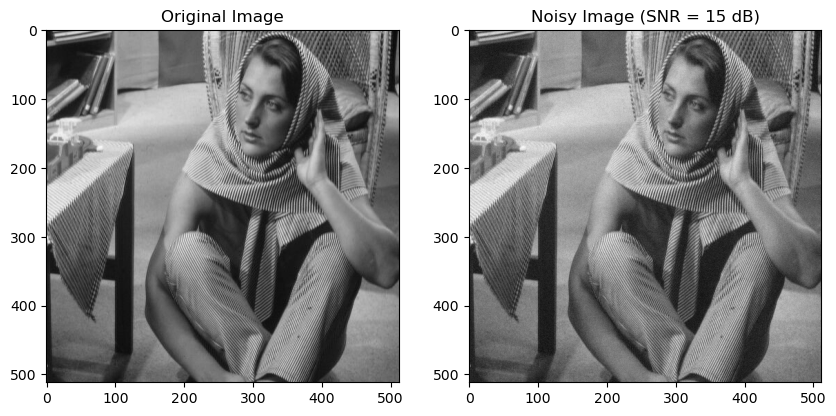

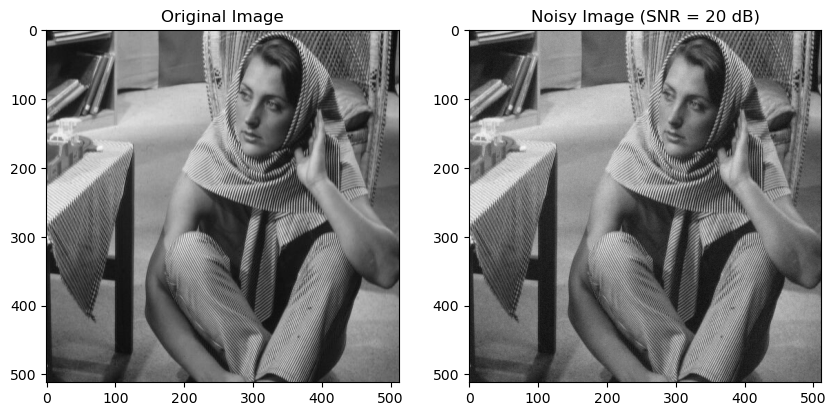

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import fft, fftfreq, fftshift, ifft, fft2, ifft2

#We simulate a noisy version of the image with various SNR (0dB, 5 dB, 10 dB, 15 dB, 20 dB), using a Gaussian white noise


# Reading the image
img_pil = Image.open('barbara.jpg').convert("L")  # Convert to grayscale
img = np.array(img_pil)  # Convert PIL Image to NumPy array

def generate_noise(img, snr):
    N= img.shape[0]*img.shape[1]
    noise_var = (np.sum(img**2)/N)* np.exp(-snr / 10)

    noise = np.random.normal(0, np.sqrt(noise_var), img.shape) #we use a gaussian noise
    return noise

def add_noise(img, snr):
    return img + generate_noise(img, snr)

def plot_noisy_image(img, snr):

    # Plotting the image and the noisy image
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    # Adding noise to the image
    noisy_img = add_noise(img, snr)
    # Cliping the values to be in range [0, 255]
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    plt.imshow(noisy_img, cmap='gray')
    plt.title('Noisy Image (SNR = ' + str(snr) + ' dB)')
    plt.show()


plot_noisy_image(img, 0)
plot_noisy_image(img, 5)
plot_noisy_image(img, 10)
plot_noisy_image(img, 15)
plot_noisy_image(img, 20)



## Denoising the image using the Wiener filter

In the previous example the difference between the original image and the denoised one was not that obvious. A low SNR makes the image appear more noisy but it is diffcult to see. In this example we will use a more noisy image and we will compare the results of the Wiener filter denoising with the original image.

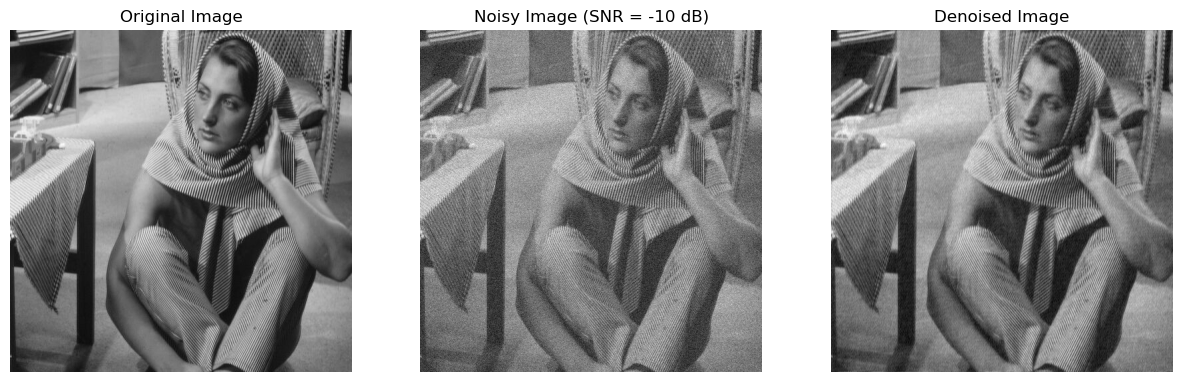

In [4]:
def wiener_filter(noisy_img, original_img, noise_img):
    
    noisy_img_fft = fft2(noisy_img)
    original_img_fft = fft2(original_img)
    noise_img_fft = fft2(noise_img)
    
    #Estimating the power spectral density of the original image and the noise
    P_x = np.abs(original_img_fft) ** 2
    P_n = np.abs(noise_img_fft) ** 2
    #Computing the Wiener filter
    H = P_x/(P_x + P_n)
    #Multiplying it with the Fourier Transform of the noisy image
    denoised_img_fft = H * noisy_img_fft
    
    # Getting the denoised image
    denoised_img = np.abs(ifft2(denoised_img_fft))
    
    denoised_img = np.clip(denoised_img, 0, 255).astype(np.uint8)
    return denoised_img

snr_value = -10
noise_img = generate_noise(img, snr_value)

# Generate a noisy image with SNR = 10 dB
noisy_img = img + noise_img

# Apply the Wiener filter to the noisy image
denoised_img = wiener_filter(noisy_img, img, noise_img)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title(f'Noisy Image (SNR = {snr_value} dB)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()


We can see that the denoise image is much closer to the original image than the noisy one.

# 3

In [ ]:
FACTOR = 0.4

In [ ]:
music = read('music.wav')[1]

In [ ]:
music_1 = music + FACTOR*noise1
music_2 = music + FACTOR*noise2
music_3 = music + FACTOR*noise3

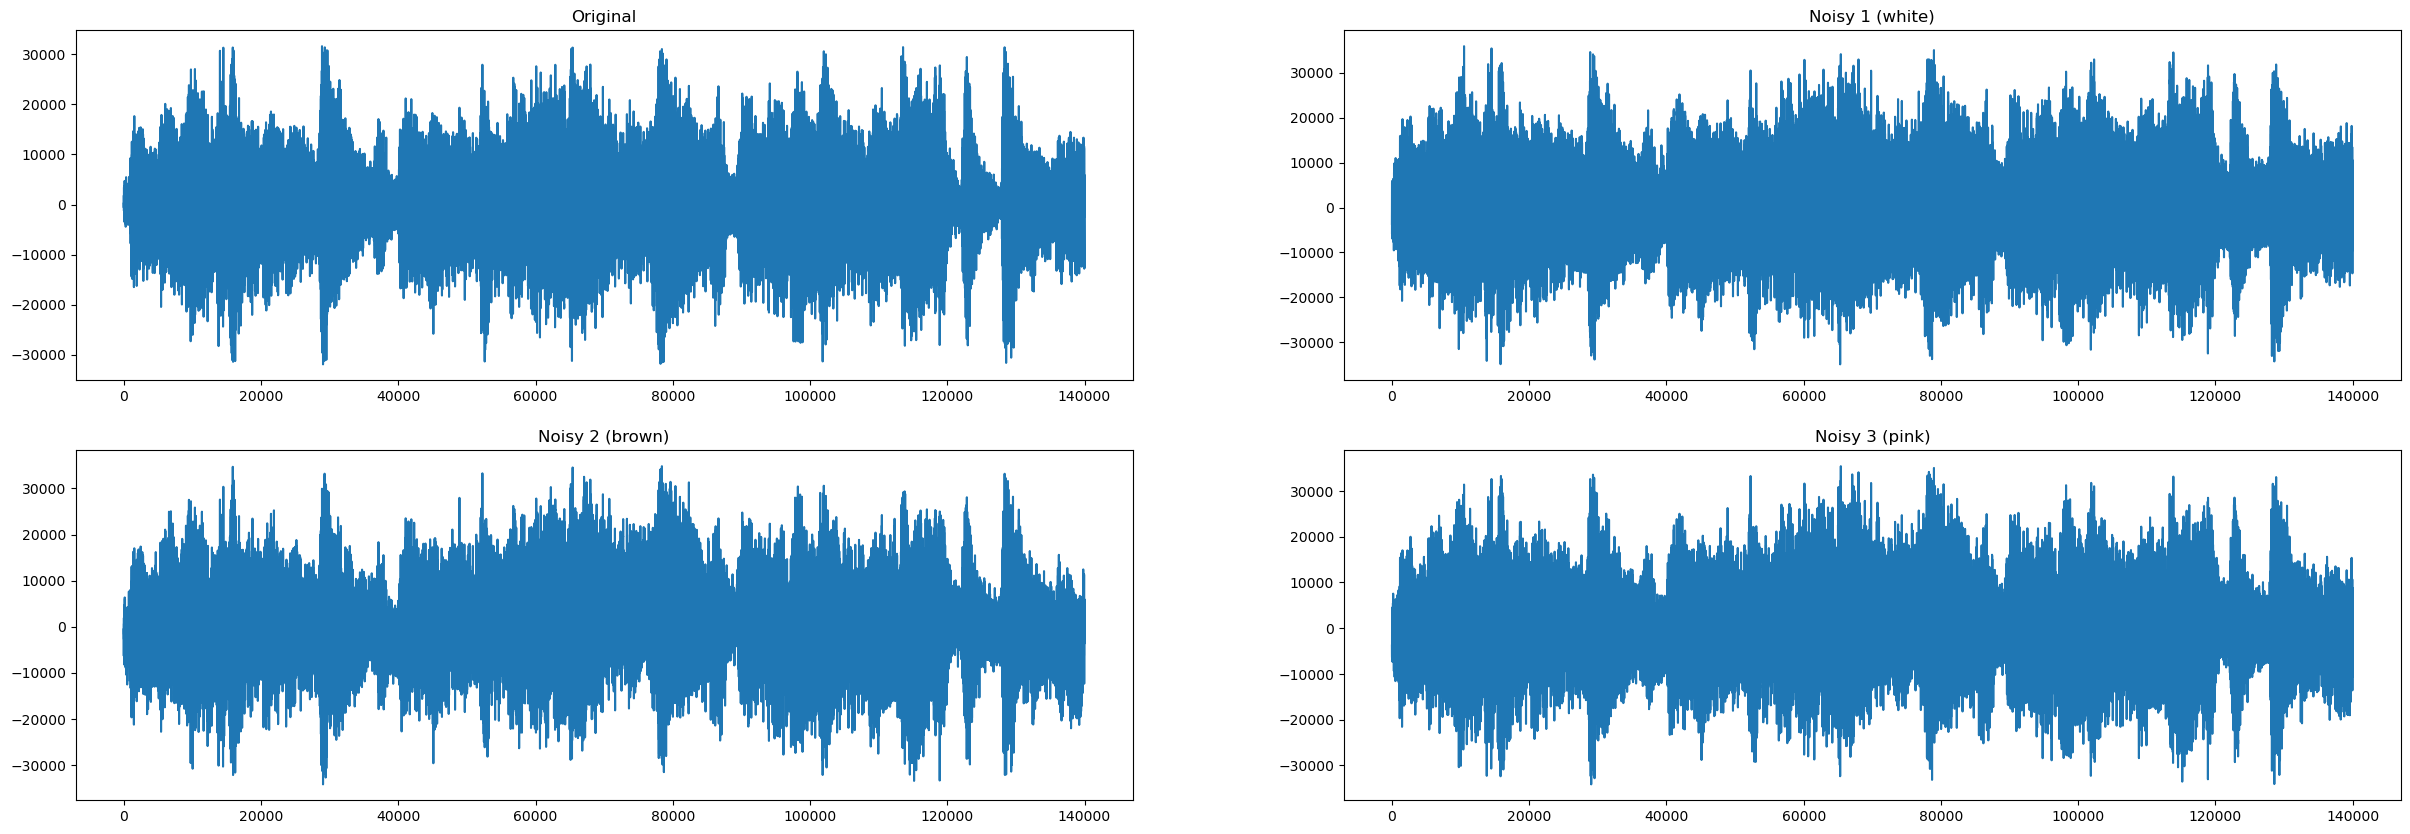

In [ ]:
plt.figure(figsize=(30,10))

plt.subplot(2,2,1)
plt.plot(music)
plt.title('Original')

plt.subplot(2,2,2)
plt.plot(music_1)
plt.title('Noisy 1 (white)')

plt.subplot(2,2,3)
plt.plot(music_2)
plt.title('Noisy 2 (brown)')

plt.subplot(2,2,4)
plt.plot(music_3)
plt.title('Noisy 3 (pink)')

plt.show()

In [ ]:
og_power = np.abs(fft(music))**2
noise1_power = FACTOR**2*np.abs(fft(noise1))**2
noise2_power = FACTOR**2*np.abs(fft(noise2))**2
noise3_power = FACTOR**2*np.abs(fft(noise3))**2

In [ ]:
filter_1 = og_power / (og_power + noise1_power)
filter_2 = og_power / (og_power + noise2_power)
filter_3 = og_power / (og_power + noise3_power)

In [ ]:
denoised_1 = np.real(ifft(filter_1*fft(music_1)))
denoised_2 = np.real(ifft(filter_2*fft(music_2)))
denoised_3 = np.real(ifft(filter_3*fft(music_3)))

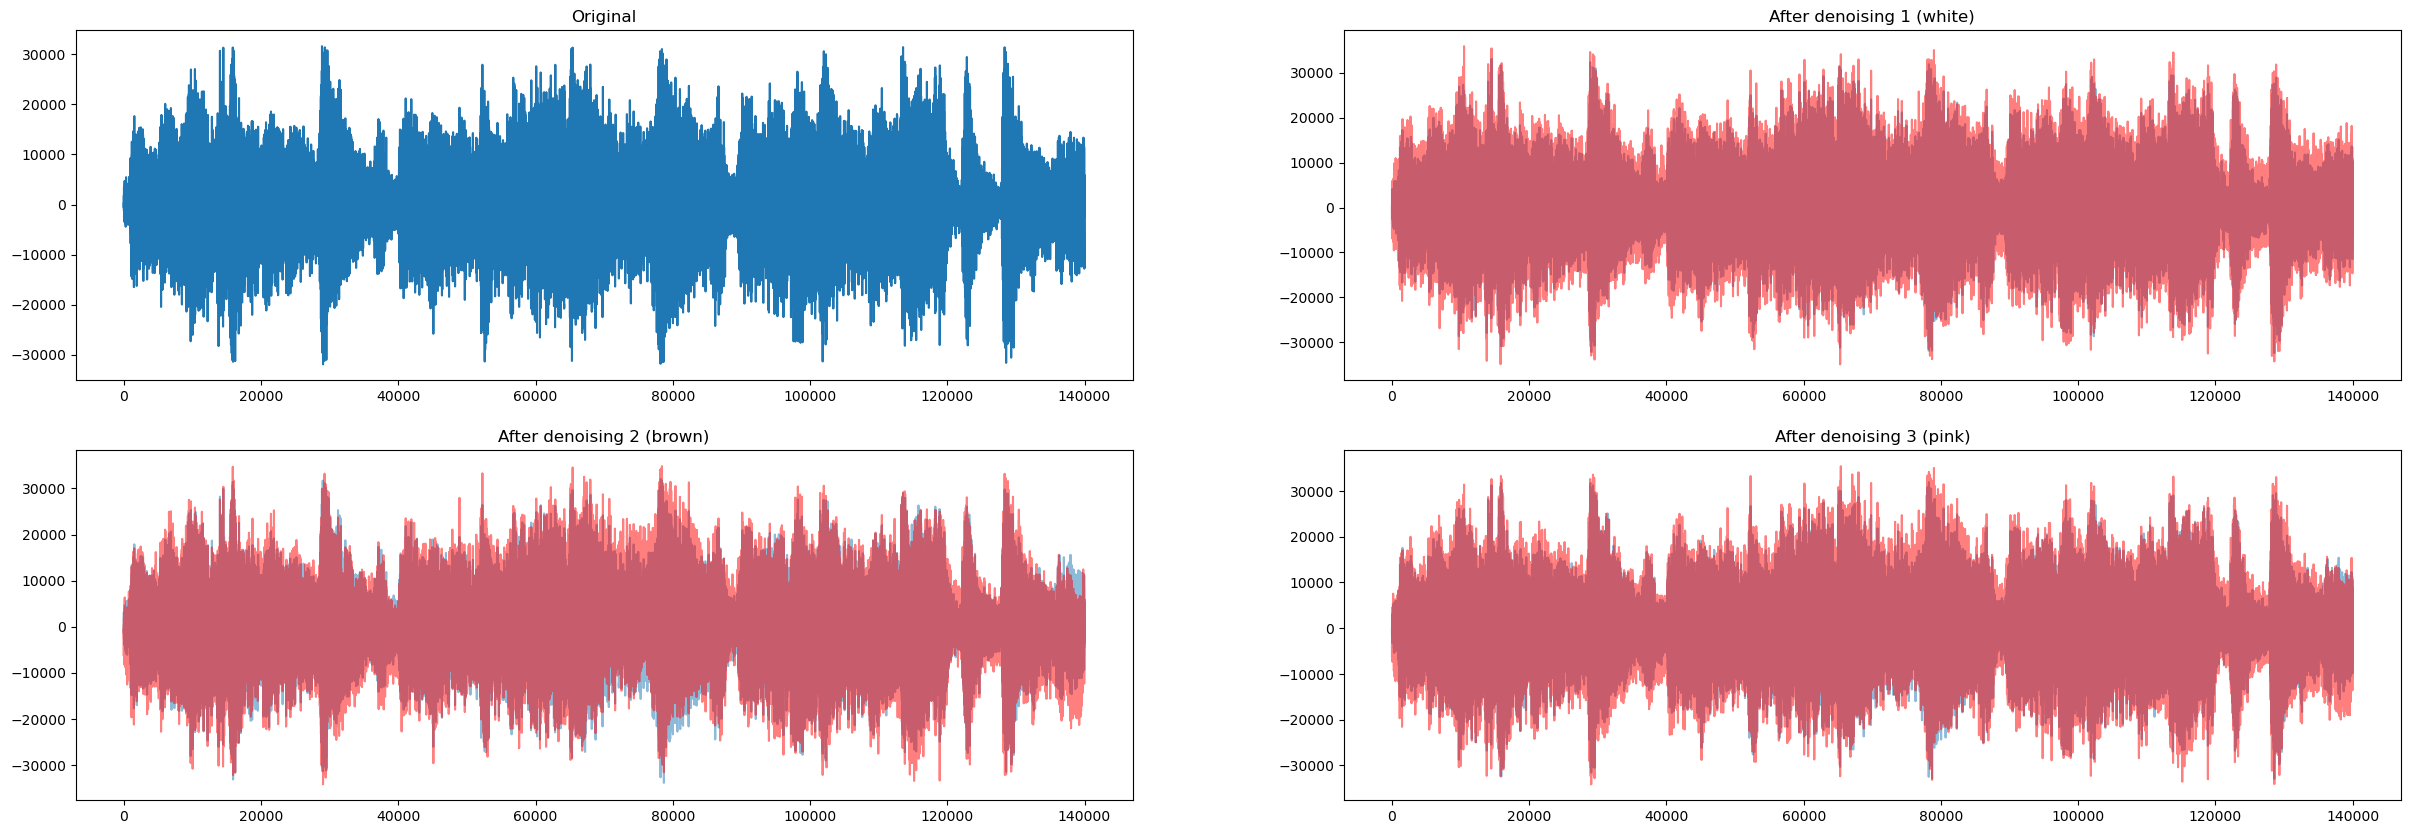

In [ ]:
plt.figure(figsize=(30,10))

plt.subplot(2,2,1)
plt.plot(music)
plt.title('Original')

plt.subplot(2,2,2)
plt.plot(denoised_1, alpha=0.5)
plt.plot(music_1, alpha=0.5, color='red')
plt.title('After denoising 1 (white)')

plt.subplot(2,2,3)
plt.plot(denoised_2, alpha=0.5)
plt.plot(music_2, alpha=0.5, color='red')
plt.title('After denoising 2 (brown)')

plt.subplot(2,2,4)
plt.plot(denoised_3, alpha=0.5)
plt.plot(music_3, alpha=0.5, color='red')
plt.title('After denoising 3 (pink)')

plt.show()